<a href="https://colab.research.google.com/github/VivekJeldi/RiskAnalytics-CreditCard/blob/main/Code_XGBoost_WOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import metrics

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTEENN

from sklearn.model_selection import GridSearchCV

In [7]:
path = 'https://raw.githubusercontent.com/VivekJeldi/RiskAnalytics-CreditCard/main/WOE_data.csv?token=GHSAT0AAAAAACFE22SR2RV77UMRQPMZKRE4ZGBAXWQ'

In [8]:
df = pd.read_csv(path)
df.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades,Performance Tag
0,954457215,0.266456,0.20095,0.203681,0.273577,0.798980,0.564476,0.920517,0.879541,0.139263,0.724382,0.0
1,432830445,0.266456,0.20095,0.203681,0.273577,0.798980,0.564476,0.920517,0.879541,0.438558,-0.277395,0.0
2,941387308,0.266456,0.20095,0.203681,0.273577,0.798980,0.564476,0.920517,0.879541,0.139263,0.724382,0.0
3,392161677,0.266456,0.20095,0.203681,0.273577,0.057889,0.564476,0.920517,0.879541,0.139263,0.724382,0.0
4,182011211,0.266456,0.20095,0.203681,0.273577,0.057889,0.564476,0.920517,0.879541,0.139263,0.724382,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   68536 non-null  int64  
 1   No of times 90 DPD or worse in last 6 months                     68536 non-null  float64
 2   No of times 30 DPD or worse in last 6 months                     68536 non-null  float64
 3   No of times 60 DPD or worse in last 12 months                    68536 non-null  float64
 4   No of times 30 DPD or worse in last 12 months                    68536 non-null  float64
 5   Avgas CC Utilization in last 12 months                           68536 non-null  float64
 6   No of trades opened in last 6 months                             68536 non-null  float64
 7   No of trades opened in last 12 months   

In [ ]:
#df_cat = df.select_dtypes(include='object')


In [10]:
#df[df_cat.columns] = df[df_cat.columns].astype('category')

In [13]:
df['Performance Tag'] = df['Performance Tag'].astype('int64').astype('category')

In [14]:
df['Performance Tag'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
y_test = df_test['Performance Tag']
X_test = df_test.drop('Performance Tag', axis=1)

In [17]:
X_test.shape

(13708, 11)

In [18]:
y_train = df_train['Performance Tag']
X_train = df_train.drop('Performance Tag', axis=1)

In [19]:
X_train.shape

(54828, 11)

In [20]:
X_train = X_train.drop('Application ID', 1)


In [21]:
col = X_train.columns

In [22]:
sum(y_train)

2317

In [23]:
len(y_train)

54828

In [24]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
y_pred = model.predict(X_test[col])

In [26]:
metrics.confusion_matrix(y_test, y_pred)

array([[13130,     4],
       [  573,     1]])

In [34]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [35]:
X_train_sm.head()

,No of times 90 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades
0,0.266456,0.20095,0.203681,0.273577,0.798980,-0.325684,-0.229537,-0.183938,0.139263,-0.277395
1,0.266456,0.20095,0.203681,0.273577,0.798980,0.564476,-0.229537,0.879541,-0.406502,-0.277395
2,0.266456,0.20095,0.203681,0.273577,0.057889,0.564476,0.920517,0.879541,0.438558,0.724382
3,0.266456,0.20095,0.203681,0.273577,-0.515250,0.564476,-0.229537,-0.183938,0.438558,-0.277395
4,0.266456,0.20095,0.203681,0.273577,0.057889,-0.301505,-0.365293,-0.365120,0.139263,-0.275152


In [36]:
sum(y_train_sm)

52511

In [37]:
len(y_train_sm)

105022

In [38]:
model_sm = XGBClassifier()
model_sm.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
y_pred_sm = model_sm.predict(X_test[col])

In [40]:
metrics.confusion_matrix(y_test, y_pred_sm)

array([[10014,  3120],
       [  344,   230]])

In [41]:
print(metrics.classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     13134
           1       0.07      0.40      0.12       574

    accuracy                           0.75     13708
   macro avg       0.52      0.58      0.48     13708
weighted avg       0.93      0.75      0.82     13708



In [165]:
n_folds = 3

xgb = XGBClassifier()

scorer = {
    #'accuracy': make_scorer(accuracy_score),
    #'f1': make_scorer(f1_score)
    'recall' : metrics.make_scorer(metrics.recall_score)
    }

imba_pipeline = make_pipeline(SMOTE(random_state=100), xgb)
#imba_pipeline = make_pipeline(SMOTENC(categorical_features=list(df_cat.columns), random_state=42), xgb)

param = 'xgbclassifier__'

Sub Sample

In [56]:
# specify range of hyperparameters
param_grid = {param+'subsample': [0.3, 0.6, 0.9]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=1)

In [57]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.720161,0.750711,0.047086,0.000600,0.3,{'xgbclassifier__subsample': 0.3},0.365285,0.296632,0.310479,0.324132,0.029644,2,0.486084,0.409061,0.391192,0.428779,0.041172
1,7.023282,0.816000,0.051849,0.004729,0.6,{'xgbclassifier__subsample': 0.6},0.363990,0.308290,0.310479,0.327586,0.025757,1,0.488673,0.427184,0.389249,0.435035,0.040968
2,6.419786,0.700570,0.062060,0.021380,0.9,{'xgbclassifier__subsample': 0.9},0.358808,0.301813,0.310479,0.323700,0.025076,3,0.486731,0.419417,0.393782,0.433310,0.039197


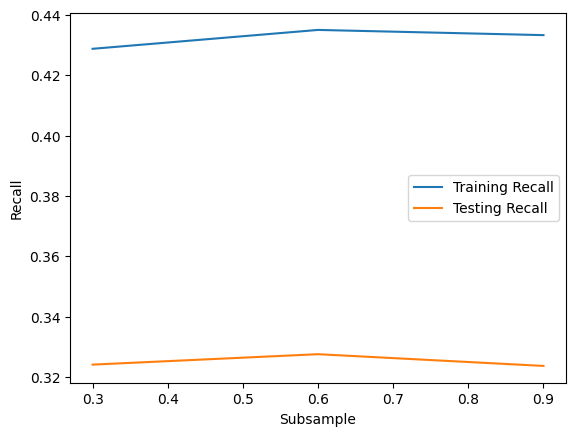

In [58]:
plt.figure()

plt.plot(scores['param_xgbclassifier__subsample'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__subsample'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Subsample')
plt.ylabel('Recall')

plt.show()

In [59]:
y_pred_sub = model_cv.predict(X_test[col])

In [60]:
print(metrics.classification_report(y_test, y_pred_sub))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     13134
           1       0.07      0.39      0.11       574

    accuracy                           0.74     13708
   macro avg       0.52      0.57      0.48     13708
weighted avg       0.93      0.74      0.82     13708



In [61]:
metrics.confusion_matrix(y_test, y_pred_sub)

array([[9929, 3205],
       [ 348,  226]])

Learning Rate

In [93]:
# Learning Rate
param_grid = {param+'learning_rate': [0.2, 0.4, 0.6]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.2, 0.4, 0.6]},
             return_train_score=True, scoring='recall', verbose=1)

In [94]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.630640,0.753553,0.047028,0.001448,0.2,{'xgbclassifier__learning_rate': 0.2},0.360104,0.312176,0.298836,0.323705,0.026308,2,0.464078,0.420065,0.362694,0.415612,0.041509
1,5.640591,0.763447,0.063797,0.021160,0.4,{'xgbclassifier__learning_rate': 0.4},0.367876,0.306995,0.291074,0.321981,0.033097,3,0.499029,0.431068,0.382772,0.437623,0.047688
2,5.883324,0.728107,0.047484,0.000803,0.6,{'xgbclassifier__learning_rate': 0.6},0.349741,0.322539,0.313066,0.328449,0.015545,1,0.502913,0.456958,0.406088,0.455320,0.039545


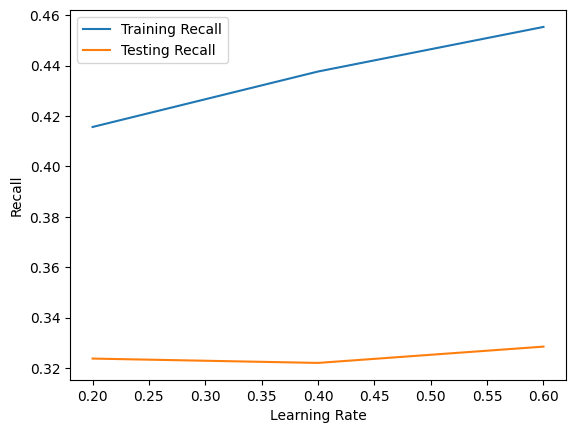

In [95]:
plt.figure()

plt.plot(scores['param_xgbclassifier__learning_rate'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__learning_rate'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Recall')

plt.show()

In [96]:
#print(model_cv.best_estimator_)

In [97]:
y_pred = model_cv.predict(X_test[col])

In [98]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     13134
           1       0.06      0.45      0.11       574

    accuracy                           0.68     13708
   macro avg       0.51      0.57      0.46     13708
weighted avg       0.93      0.68      0.78     13708



In [99]:
metrics.confusion_matrix(y_test, y_pred)

array([[9084, 4050],
       [ 313,  261]])

In [72]:
# Max Depth
param_grid = {param+'max_depth': [1,3,5]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__max_depth': [1, 3, 5]},
             return_train_score=True, scoring='recall', verbose=1)

In [73]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.119745,0.965314,0.026523,0.009089,1,{'xgbclassifier__max_depth': 1},0.591969,0.582902,0.664942,0.613271,0.036724,1,0.620712,0.576699,0.652850,0.616754,0.031214
1,2.941357,0.783788,0.028582,0.000048,3,{'xgbclassifier__max_depth': 3},0.358808,0.305699,0.269082,0.311196,0.036836,3,0.405825,0.363754,0.303756,0.357779,0.041883
2,4.578211,0.799312,0.043002,0.002646,5,{'xgbclassifier__max_depth': 5},0.358808,0.310881,0.276843,0.315511,0.033622,2,0.455016,0.413592,0.343264,0.403958,0.046128


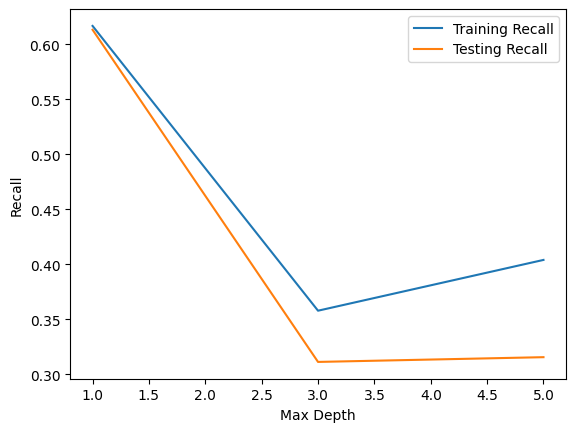

In [74]:
plt.figure()

plt.plot(scores['param_xgbclassifier__max_depth'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__max_depth'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Recall')

plt.show()

In [75]:
y_pred = model_cv.predict(X_test[col])

In [76]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71     13134
           1       0.07      0.72      0.12       574

    accuracy                           0.57     13708
   macro avg       0.52      0.64      0.42     13708
weighted avg       0.94      0.57      0.69     13708



In [77]:
metrics.confusion_matrix(y_test, y_pred)

array([[7393, 5741],
       [ 163,  411]])

In [100]:
# Number of Estimators
param_grid = {param+'n_estimators': [100,200,500,700,1000]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__n_estimators': [100, 200, 500, 700,
                                                         1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [101]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.491738,0.786817,0.048758,0.001059,100,{'xgbclassifier__n_estimators': 100},0.361399,0.306995,0.297542,0.321979,0.028140,5,0.489320,0.421359,0.382124,0.430935,0.044283
1,11.326408,0.066121,0.081444,0.000901,200,{'xgbclassifier__n_estimators': 200},0.351036,0.319948,0.314360,0.328448,0.016134,4,0.498382,0.451133,0.403497,0.451004,0.038737
2,27.845713,0.866118,0.188069,0.005624,500,{'xgbclassifier__n_estimators': 500},0.353627,0.321244,0.322122,0.332331,0.015063,2,0.519094,0.462136,0.419041,0.466757,0.040977
3,38.886457,0.444919,0.256729,0.006168,700,{'xgbclassifier__n_estimators': 700},0.354922,0.318653,0.323415,0.332330,0.016093,3,0.524272,0.457605,0.426813,0.469563,0.040676
4,55.934473,0.544782,0.373117,0.009600,1000,{'xgbclassifier__n_estimators': 1000},0.358808,0.318653,0.324709,0.334057,0.017676,1,0.530097,0.463430,0.434585,0.476038,0.039999


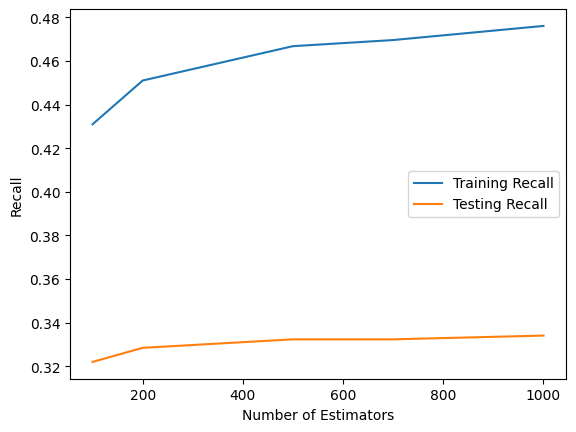

In [102]:
plt.figure()

plt.plot(scores['param_xgbclassifier__n_estimators'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__n_estimators'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')

plt.show()

In [103]:
y_pred = model_cv.predict(X_test[col])

In [104]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     13134
           1       0.06      0.45      0.11       574

    accuracy                           0.68     13708
   macro avg       0.51      0.57      0.46     13708
weighted avg       0.93      0.68      0.78     13708



In [105]:
metrics.confusion_matrix(y_test, y_pred)

array([[9069, 4065],
       [ 315,  259]])

In [166]:
# Hyperparameter Tuning
param_grid = {param+'max_depth': [1,2] ,
    param+'n_estimators': [100,300,500]
    }

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__max_depth': [1, 2],
                         'xgbclassifier__n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='recall', verbose=1)

In [167]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__max_depth,param_xgbclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.925266,1.218369,0.020288,0.000585,1,100,"{'xgbclassifier__max_depth': 1, 'xgbclassifier...",0.591969,0.582902,0.664942,0.613271,0.036724,1,0.620712,0.576699,0.652850,0.616754,0.031214
1,3.526219,0.808792,0.032969,0.003684,1,300,"{'xgbclassifier__max_depth': 1, 'xgbclassifier...",0.549223,0.567358,0.548512,0.555031,0.008721,2,0.577994,0.564401,0.550518,0.564304,0.011217
2,5.621524,0.914928,0.042828,0.000928,1,500,"{'xgbclassifier__max_depth': 1, 'xgbclassifier...",0.518135,0.537565,0.492885,0.516195,0.018292,3,0.552751,0.532686,0.499352,0.528263,0.022023
3,2.270792,0.539040,0.032707,0.007661,2,100,"{'xgbclassifier__max_depth': 2, 'xgbclassifier...",0.332902,0.352332,0.300129,0.328454,0.021542,4,0.370227,0.378641,0.316710,0.355192,0.027427
4,5.544588,0.804028,0.042730,0.001526,2,300,"{'xgbclassifier__max_depth': 2, 'xgbclassifier...",0.353627,0.301813,0.250970,0.302137,0.041910,6,0.390939,0.345631,0.270725,0.335765,0.049570


In [108]:
y_pred = model_cv.predict(X_test[col])

In [109]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79     13134
           1       0.07      0.59      0.13       574

    accuracy                           0.66     13708
   macro avg       0.52      0.63      0.46     13708
weighted avg       0.94      0.66      0.76     13708



In [111]:
metrics.confusion_matrix(y_test, y_pred)

array([[8763, 4371],
       [ 233,  341]])

Final Hyperparameters

In [188]:
# Hyperparameter Tuning
params = {'max_depth': 1,
    'n_estimators': 100,
    'subsample': 0.8,
    'learning_rate': 0.6
    }

model_final = XGBClassifier(**params)

model_final.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [189]:
y_pred = model_final.predict(X_test[col])

In [190]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.66      0.79     13134
           1       0.07      0.61      0.13       574

    accuracy                           0.66     13708
   macro avg       0.52      0.64      0.46     13708
weighted avg       0.94      0.66      0.76     13708



In [191]:
metrics.confusion_matrix(y_test, y_pred)

array([[8703, 4431],
       [ 225,  349]])

In [192]:
metrics.roc_auc_score(y_test, y_pred)

0.6353226378964826

Gain, Lift and KS Statistic

In [193]:
len(df)

68536

In [194]:
y_pred_final = model_final.predict_proba(df[col])

In [201]:
y_pred_1 = y_pred_final[:, 1]

In [202]:
y_pred_df = pd.DataFrame(y_pred_1)
y_pred_df.head()

,0
0,0.215021
1,0.243901
2,0.215021
3,0.253657
4,0.253657


In [206]:
df_pred = pd.concat([df[['Application ID', 'Performance Tag']], y_pred_df], axis=1)
df_pred.head()

,Application ID,Performance Tag,0
0,954457215,0,0.215021
1,432830445,0,0.243901
2,941387308,0,0.215021
3,392161677,0,0.253657
4,182011211,0,0.253657


In [207]:
df_pred.shape

(68536, 3)

In [211]:
df_pred = df_pred.rename(columns={0:'pred_prob'})
df_pred.head()

,Application ID,Performance Tag,pred_prob
54229,896728565,0,0.732029
57452,16017108,0,0.732029
58292,125845743,0,0.717898
56125,412214372,0,0.717898
63238,289956504,0,0.717898


In [212]:
df_pred = df_pred.sort_values('pred_prob', ascending=False)
df_pred.head()

,Application ID,Performance Tag,pred_prob
54229,896728565,0,0.732029
57452,16017108,0,0.732029
58292,125845743,0,0.717898
56125,412214372,0,0.717898
63238,289956504,0,0.717898


In [216]:
df_pred['default'] = df_pred['pred_prob'].map(lambda x:1 if x>0.5 else 0)
df_pred.head()

,Application ID,Performance Tag,pred_prob,default
54229,896728565,0,0.732029,1
57452,16017108,0,0.732029,1
58292,125845743,0,0.717898,1
56125,412214372,0,0.717898,1
63238,289956504,0,0.717898,1


In [309]:
df_pred['Decile'] = pd.qcut(df_pred['pred_prob'], q=10, labels=range(10,1,-1), duplicates='drop')
df_pred.head()


,Application ID,Performance Tag,pred_prob,default,Decile
54229,896728565,0,0.732029,1,2
57452,16017108,0,0.732029,1,2
58292,125845743,0,0.717898,1,2
56125,412214372,0,0.717898,1,2
63238,289956504,0,0.717898,1,2


In [306]:
df_pred['Decile'].unique()

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

In [307]:
df_pred['Decile'].nunique()

9

In [285]:
df_pred.groupby(by='Decile').count()

,Application ID,Performance Tag,pred_prob,default
Decile,,,,
0,15190,15190,15190,15190
1,6172,6172,6172,6172
2,6184,6184,6184,6184
3,7246,7246,7246,7246
4,9308,9308,9308,9308
5,5501,5501,5501,5501
6,5704,5704,5704,5704
7,6424,6424,6424,6424
8,6807,6807,6807,6807


In [301]:
bin_edges = np.linspace(df_pred['pred_prob'].max(), df_pred['pred_prob'].min(), num=10)
bin_edges


array([0.73202878, 0.67261412, 0.61319946, 0.5537848 , 0.49437014,
       0.43495548, 0.37554082, 0.31612616, 0.2567115 , 0.19729684])

In [302]:
bins = np.digitize(df_pred['pred_prob'], bin_edges, right=True)
bins


array([ 1,  1,  1, ..., 10, 10, 10])

In [303]:
df_pred['Decile'] = bins
df_pred.head()

,Application ID,Performance Tag,pred_prob,default,Decile
54229,896728565,0,0.732029,1,1
57452,16017108,0,0.732029,1,1
58292,125845743,0,0.717898,1,1
56125,412214372,0,0.717898,1,1
63238,289956504,0,0.717898,1,1


In [304]:
df_pred.groupby('Decile').count()

,Application ID,Performance Tag,pred_prob,default
Decile,,,,
1,1390,1390,1390,1390
2,8169,8169,8169,8169
3,7595,7595,7595,7595
4,6994,6994,6994,6994
5,14129,14129,14129,14129
6,5909,5909,5909,5909
7,2537,2537,2537,2537
8,4535,4535,4535,4535
9,17264,17264,17264,17264
